# Recherche de modèles adaptés à chaque branche

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
color = sn.color_palette()
import plotly.express as px
from scipy.stats import pearsonr
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Pour Preprocessing:
from sklearn.preprocessing import LabelEncoder

# Régression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Normalisation des variables quantitatives
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Sélection de fonctionnalités pour améliorer la construction de modèles:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Evaluation
from sklearn.model_selection import RepeatedStratifiedKFold

# Recherches
from scipy.stats import loguniform # espace de recherches
from sklearn.model_selection import RandomizedSearchCV

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)
plt.rcParams['font.size'] = 17

In [26]:
dataset = pd.read_csv('Fichiers\dataset2.csv', sep = ',')
dataset

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,compte_joint,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,age,segment_client,var_0,branche,churn
0,3463,H,0.0,non,non,37.0,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,30.0,A4,3788.182745,NORD-OUEST,non
1,1463,F,0.0,non,non,4.0,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,70.40,32.0,B2,5108.994106,NORD-OUEST,oui
2,688,H,0.0,non,non,52.0,non,bail,basic,non,oui,non,non,non,non,perso,non,courrier,30.10,57.0,A1,13927.908142,NORD-OUEST,non
3,2478,H,0.0,non,non,4.0,oui,permanent,basic,non,non,non,non,non,non,pro,non,courrier,44.55,27.0,D1,6609.031122,NORD-OUEST,non
4,242,F,0.0,oui,oui,41.0,oui,permanent,basic,oui,non,non,oui,oui,oui,perso,oui,sms,74.70,71.0,D1,3582.799035,NORD-OUEST,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,782,H,0.0,oui,oui,27.0,oui,permanent,basic,oui,oui,non,non,non,non,pro,oui,sms,54.75,26.0,C2,7423.819318,SUD-EST,non
3131,5773,F,0.0,non,non,35.0,oui,permanent,basic,oui,oui,oui,non,non,non,pro,non,mail,60.55,54.0,C4,7788.303670,CENTRE,non
3132,6801,F,0.0,oui,oui,19.0,oui,consommation,medium,non,non,non,oui,non,oui,perso,oui,telephone,89.35,43.0,B1,11304.091638,CENTRE,non
3133,3548,H,0.0,non,non,71.0,oui,consommation,medium,oui,non,non,oui,non,oui,perso,non,sms,97.65,65.0,C4,11727.651032,OUTRE-MER,non


In [27]:
# Création d'un onehotencodeur:
le = LabelEncoder()
# Le onehotencodeur encodera les variables ayant au plus deux modalités: 
le_count = 0
for col in data.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} variables ont été hot-encodées.'.format(le_count))

14 variables ont été hot-encodées.


In [71]:
branche1 = dataset[dataset.branche == 'NORD-OUEST'].copy()
branche2 = dataset[dataset.branche == 'NORD-EST'].copy()
branche3 = dataset[dataset.branche == 'CENTRE'].copy()
branche4 = dataset[dataset.branche == 'SUD-OUEST'].copy()
branche5 = dataset[dataset.branche == 'SUD-EST'].copy()
branche6 = dataset[dataset.branche == 'OUTRE-MER'].copy()

In [44]:
def modeling(algo, nom_algo, params = {}):
    '''Modélisation et calcul des indicateurs de performance du modèle'''
    model = algo(**params) # Instanciation de l'algorithme et des paramètres s'il y en a.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Performance du modèle:
    def affichage_scores(algo, y_true, y_pred):
        print(nom_algo)
        acc_score = accuracy_score(y_true, y_pred).round(4)
        print("accuracy: ", acc_score)
        pre_score = precision_score(y_true, y_pred).round(4)
        print("precision: ", pre_score)
        rec_score = recall_score(y_true, y_pred).round(4)                            
        print("recall: ", rec_score)
        f_score = f1_score(y_true, y_pred, average = 'weighted').round(4)
        print("f1_score: ",f_score)

    affichage_scores(algo, y_test, y_pred)
    return model

In [41]:
identite = branche1['id_client']
branche1.drop(['id_client', 'branche'], axis = 1, inplace = True)
# Conversion des dernières variable catégorielle en variables dummisées:
branche1 = pd.get_dummies(branche1)
branche1 = pd.concat([identite, branche1], axis = 1)

In [43]:
# Normalisation des données après avoir pris le soin de retirer l'indicateur "id_client":
search = branche1.drop(['id_client'], axis = 1)
sc = MinMaxScaler()
for col in search.select_dtypes(exclude = ['object']):
    search[col] = sc.fit_transform(search[[col]])

In [46]:
X = search.drop('churn', axis = 1)
y = search['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)  

In [47]:
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7163
precision:  0.6415
recall:  0.6182
f1_score:  0.7153


In [49]:
log = LogisticRegression()
rfecv = RFECV(estimator = log, cv = StratifiedKFold(10, random_state = 50, shuffle = True), scoring = "accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

Nombre optimal d'indicateurs: 10


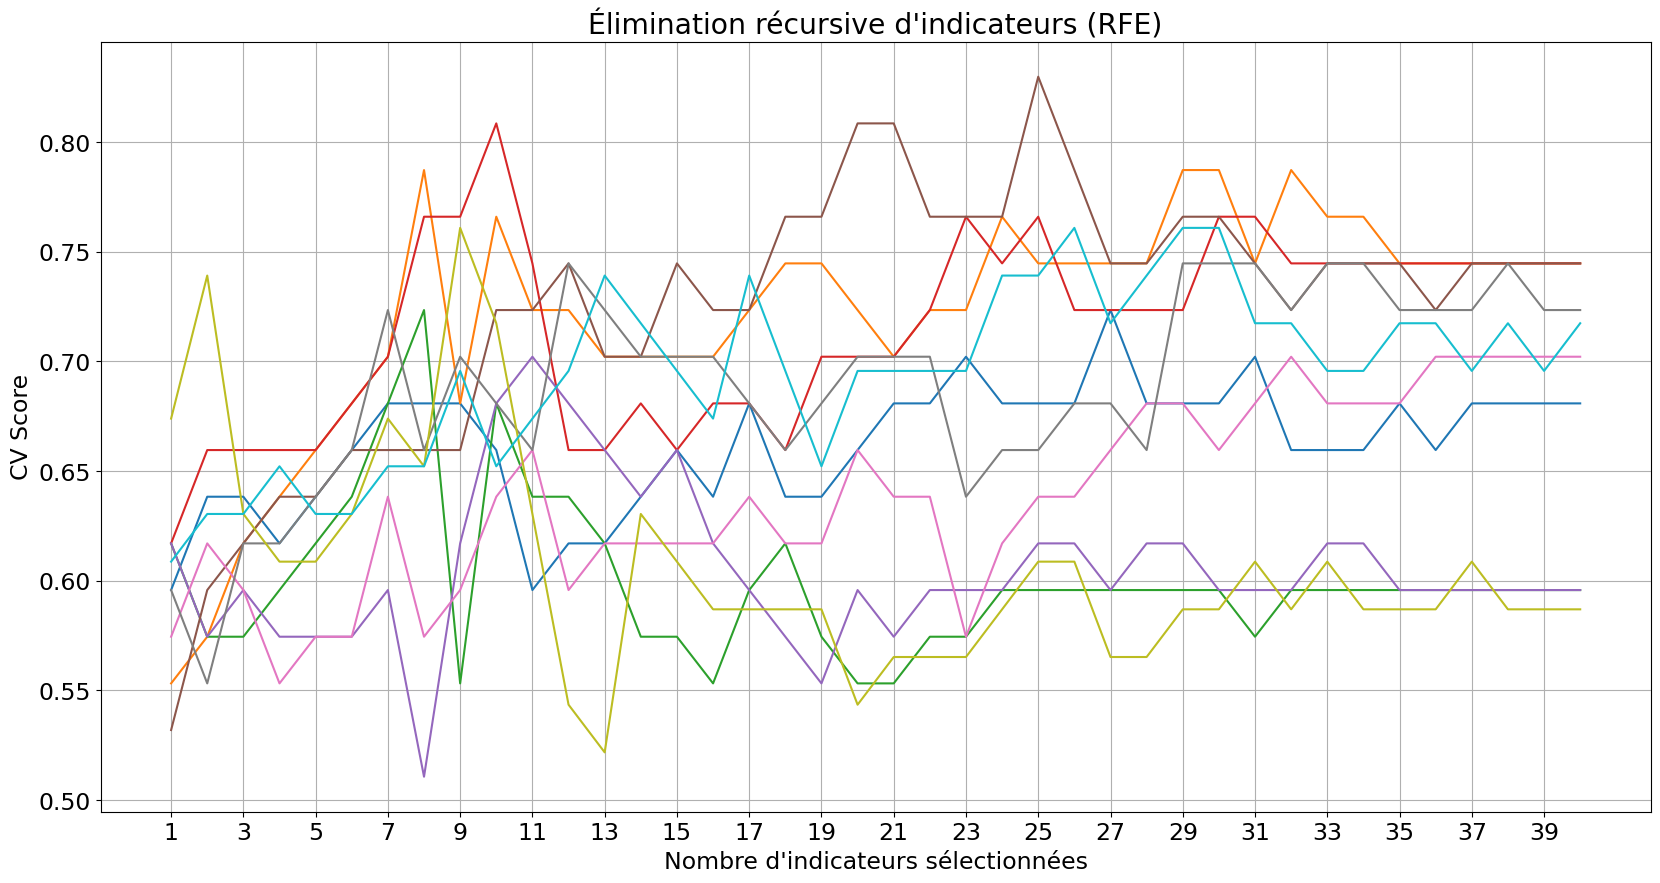

In [59]:
print("Nombre optimal d'indicateurs: {}".format(rfecv.n_features_))
plt.figure(figsize = (20, 10))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1] + 1, 2))
plt.xlabel("Nombre d'indicateurs sélectionnées")
plt.ylabel("CV Score")
plt.title("Élimination récursive d'indicateurs (RFE)");

In [52]:
# Enregistrement du jeu de données avec les caractéristiques optimales
X_rfe = X.iloc[:, rfecv.support_]

# Vue d'ensemble des caractéristiques optimales par rapport au jeu de données initiale:
print('"X" dimension: {}\n'.format(X.shape))
print('"X" liste de variables:', X.columns.tolist(), '\n')
print('"X_rfe" dimension: {}\n'.format(X_rfe.shape))
print('"X_rfe" liste de variables:', X_rfe.columns.tolist())

"X" dimension: (468, 40)

"X" liste de variables: ['genre', 'espace_client_web', 'assurance_vie', 'banque_principale', 'anciennete_mois', 'compte_epargne', 'cartes_bancaires', 'compte_courant', 'compte_joint', 'PEA', 'assurance_auto', 'assurance_habitation', 'credit_immo', 'type', 'compte_titres', 'agios_6mois', 'age', 'var_0', 'credit_autres_bail', 'credit_autres_consommation', 'credit_autres_permanent', 'methode_contact_courrier', 'methode_contact_mail', 'methode_contact_sms', 'methode_contact_telephone', 'segment_client_A1', 'segment_client_A2', 'segment_client_A3', 'segment_client_A4', 'segment_client_B1', 'segment_client_B2', 'segment_client_B3', 'segment_client_B4', 'segment_client_C1', 'segment_client_C2', 'segment_client_C3', 'segment_client_C4', 'segment_client_D1', 'segment_client_D2', 'segment_client_D3'] 

"X_rfe" dimension: (468, 10)

"X_rfe" liste de variables: ['anciennete_mois', 'agios_6mois', 'age', 'var_0', 'segment_client_A2', 'segment_client_A3', 'segment_client_B3'

In [53]:
# Recalcul des performances de la régression logistique avec les caractéristiques optimales:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, stratify = y, test_size = 0.30, random_state = 0)  
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

Logistic Regression Classification
accuracy:  0.7021
precision:  0.7436
recall:  0.4754
f1_score:  0.6874


In [54]:
log_rfe = LogisticRegression(random_state = 0)
log_rfe.fit(X_rfe, y)

LogisticRegression(random_state=0)

In [56]:
# Analyse des coefficients
feature_importances = pd.concat([pd.DataFrame(X_rfe.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(log_rfe.coef_), columns = ["coef"])], axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
6,segment_client_B3,1.843422
9,segment_client_D3,1.605308
1,agios_6mois,1.533415
4,segment_client_A2,1.531380
8,segment_client_D2,1.500673
5,segment_client_A3,1.422943
7,segment_client_B4,1.392968
2,age,-1.263450
0,anciennete_mois,-1.273424
3,var_0,-1.878224


Logistic Regression
accuracy:  0.8795
precision:  0.8545
recall:  0.7966
f1_score:  0.8785
Nombre optimal d'indicateurs: 35


C:\Users\Raphael\anaconda3\envs\project\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


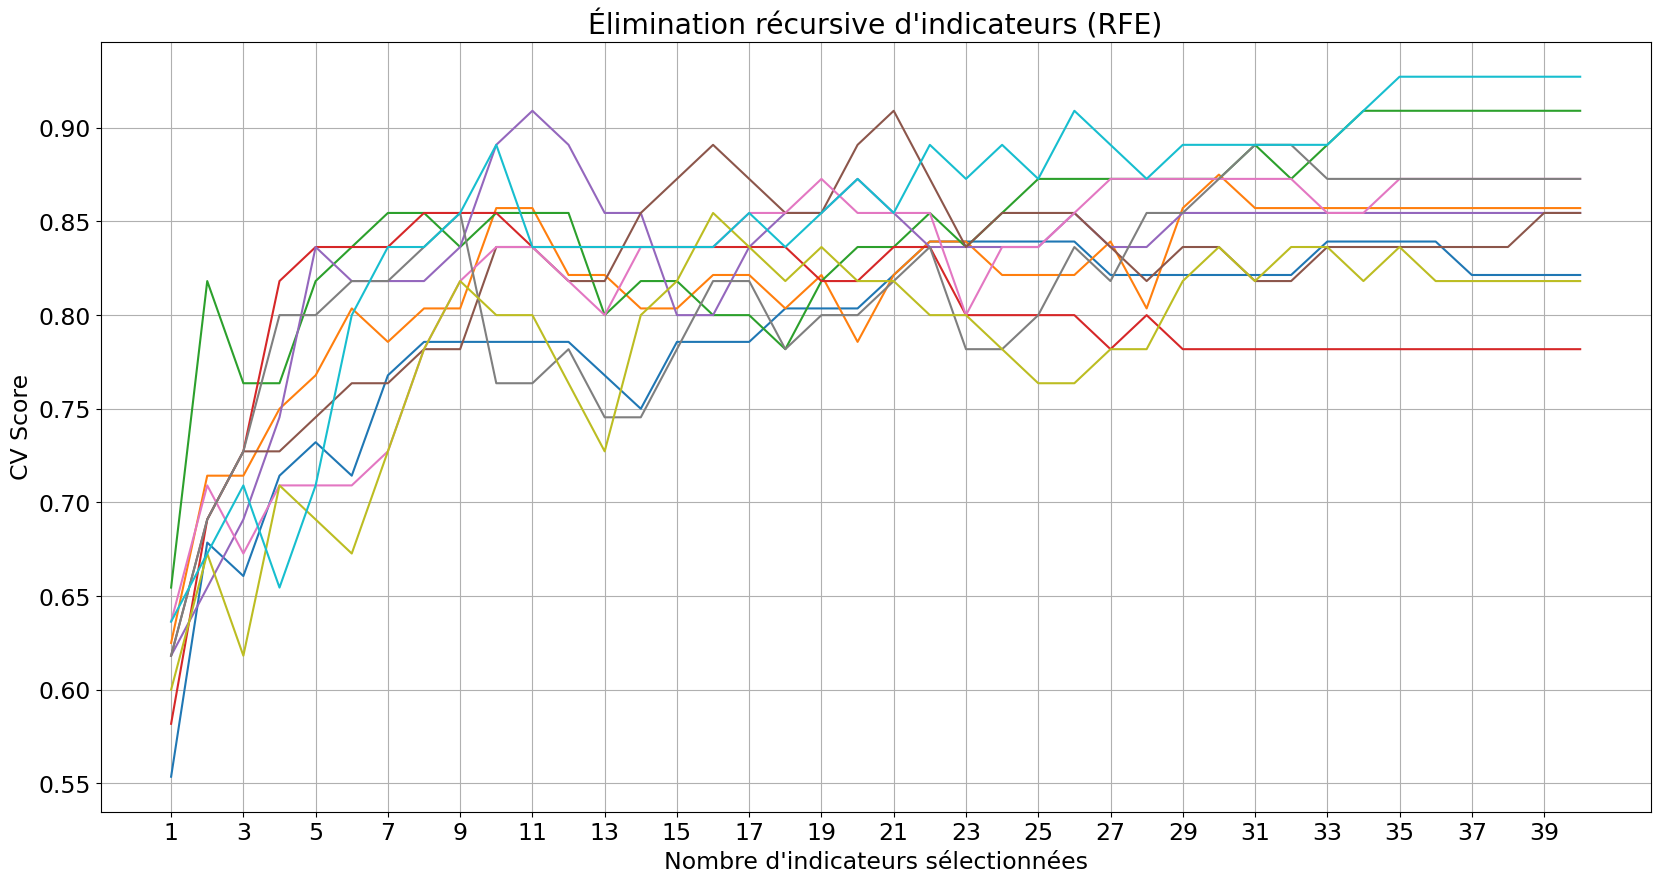

In [72]:
identite = branche2['id_client']
branche2.drop(['id_client', 'branche'], axis = 1, inplace = True)
# Conversion des dernières variable catégorielle en variables dummisées:
branche2 = pd.get_dummies(branche2)
branche2 = pd.concat([identite, branche2], axis = 1)

# Normalisation des données après avoir pris le soin de retirer l'indicateur "id_client":
search = branche2.drop(['id_client'], axis = 1)
sc = MinMaxScaler()
for col in search.select_dtypes(exclude = ['object']):
    search[col] = sc.fit_transform(search[[col]])

X = search.drop('churn', axis = 1)
y = search['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)  

log_model = modeling(LogisticRegression, 'Logistic Regression')

log = LogisticRegression()
rfecv = RFECV(estimator = log, cv = StratifiedKFold(10, random_state = 50, shuffle = True), scoring = "accuracy")
rfecv.fit(X, y)

print("Nombre optimal d'indicateurs: {}".format(rfecv.n_features_))
plt.figure(figsize = (20, 10))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1] + 1, 2))
plt.xlabel("Nombre d'indicateurs sélectionnées")
plt.ylabel("CV Score")
plt.title("Élimination récursive d'indicateurs (RFE)");

In [79]:
# Enregistrement du jeu de données avec les caractéristiques optimales
X_rfe = X.iloc[:, rfecv.support_]

# Vue d'ensemble des caractéristiques optimales par rapport au jeu de données initiale:
print('"X" dimension: {}\n'.format(X.shape))
print('"X" liste de variables:', X.columns.tolist(), '\n')
print('"X_rfe" dimension: {}\n'.format(X_rfe.shape))
print('"X_rfe" liste de variables:', X_rfe.columns.tolist())

# Recalcul des performances de la régression logistique avec les caractéristiques optimales:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, stratify = y, test_size = 0.30, random_state = 0)  
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

log_rfe = LogisticRegression(random_state = 0)
log_rfe.fit(X_rfe, y)

# Analyse des coefficients
feature_importances = pd.concat([pd.DataFrame(X_rfe.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(log_rfe.coef_), columns = ["coef"])], axis = 1)
feature_importances#.sort_values("coef", ascending = False)

"X" dimension: (552, 40)

"X" liste de variables: ['genre', 'espace_client_web', 'assurance_vie', 'banque_principale', 'anciennete_mois', 'compte_epargne', 'cartes_bancaires', 'compte_courant', 'compte_joint', 'PEA', 'assurance_auto', 'assurance_habitation', 'credit_immo', 'type', 'compte_titres', 'agios_6mois', 'age', 'var_0', 'credit_autres_bail', 'credit_autres_consommation', 'credit_autres_permanent', 'methode_contact_courrier', 'methode_contact_mail', 'methode_contact_sms', 'methode_contact_telephone', 'segment_client_A1', 'segment_client_A2', 'segment_client_A3', 'segment_client_A4', 'segment_client_B1', 'segment_client_B2', 'segment_client_B3', 'segment_client_B4', 'segment_client_C1', 'segment_client_C2', 'segment_client_C3', 'segment_client_C4', 'segment_client_D1', 'segment_client_D2', 'segment_client_D3'] 

"X_rfe" dimension: (552, 35)

"X_rfe" liste de variables: ['genre', 'espace_client_web', 'banque_principale', 'anciennete_mois', 'compte_epargne', 'cartes_bancaires', 'co

,features,coef
0,genre,-0.300303
1,espace_client_web,0.306010
2,banque_principale,-0.111844
3,anciennete_mois,-2.129849
4,compte_epargne,-0.281960
5,cartes_bancaires,1.032538
6,compte_courant,-0.619505
7,compte_joint,-0.480495
8,PEA,0.133456
9,assurance_auto,-0.510746


# etc...